# Analysing COVID-19 Data

This notebook looks at the most relevant dataset to our lives at the moment: the global spread of COVID-19. It shows the analysis of the number of infections for countries reporting COVID-19 since the first case was reported. I have used online sources to acquire open and up to date datasets showing the number of cases in different regions of the world.

In [1]:
#Importing the basic libraries
import pandas as pd
import numpy as np

%matplotlib inline

## Getting the Data

The first step is to get a copy of the raw data.  The data is being made available by Johns Hopkins University in [this GitHub repository](https://github.com/CSSEGISandData/COVID-19). The global confirmed cases dataset is the one being used in this notebook .

I chose to read it from the URL so as to get live updates. 

In [2]:
# load the live dataset, assumes a working network connection
covid_data_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(covid_data_url)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [31]:
covid.sample(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
140,NaN,Jordan,31.2400,36.5100,0,0,0,0,0,0,...,391,397,401,402,407,413,417,425,428,435
30,NaN,Bulgaria,42.7339,25.4858,0,0,0,0,0,0,...,685,713,747,800,846,878,894,929,975,1024
155,NaN,Malta,35.9375,14.3754,0,0,0,0,0,0,...,384,393,399,412,422,426,427,431,443,444
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,327,327,327,328,328,328,328,328,328,328
17,NaN,Azerbaijan,40.1431,47.5769,0,0,0,0,0,0,...,1148,1197,1253,1283,1340,1373,1398,1436,1480,1518
125,NaN,Guyana,5.0000,-58.7500,0,0,0,0,0,0,...,45,47,55,55,63,63,65,65,66,67
186,NaN,Romania,45.9432,24.9668,0,0,0,0,0,0,...,6633,6879,7216,7707,8067,8418,8746,8936,9242,9710
105,NaN,Fiji,-17.7134,178.0650,0,0,0,0,0,0,...,16,16,16,17,17,17,17,18,18,18
174,NaN,North Macedonia,41.6086,21.7453,0,0,0,0,0,0,...,854,908,974,1081,1117,1170,1207,1225,1231,1259
73,Shandong,China,36.3427,118.1498,2,6,15,27,46,75,...,784,784,784,784,787,787,787,787,787,787


## Explore the Data

The format of this data is one row per geographical region with columns for Lat/Long and then one column for each day's data.  Most regions are countries but in some cases, as in Australia, they are states.  

For the analysis we want to do we'll look at data for countries only, so the first operation on the data frame is to combine all of the rows for countries like Australia that are split into states.  We then drop the non-numeric columns to leave us with just the numbers on each day for each country. This is done to make a new dataframe containing just the numerical data.

In [32]:
grouped = covid.groupby('Country/Region').sum()
grouped = grouped.drop(columns=['Lat', 'Long'])

Visualizing the data for one country (random country) by plotting to see the exponential rise in case numbers over time.

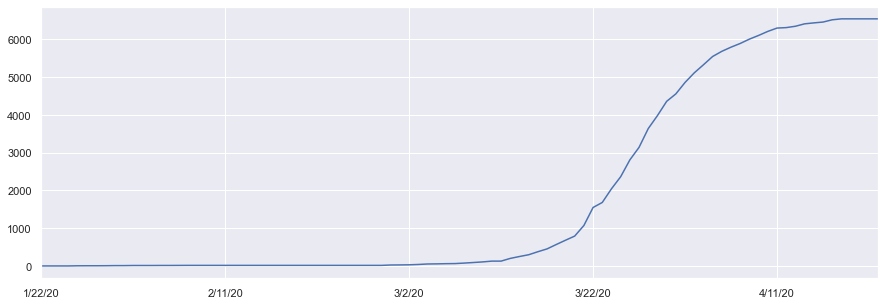

In [33]:
#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})


grouped.loc['Australia'].plot(linewidth=1.5)

## Comparing Different Countries

Text(0, 0.5, 'Number of Infections')

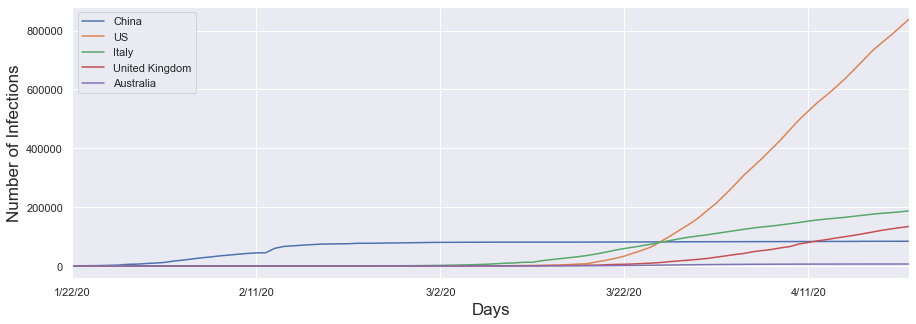

In [34]:
compare = pd.concat([grouped.loc['China'],
                    grouped.loc['US'],
                    grouped.loc['Italy'],
                    grouped.loc['United Kingdom'],
                    grouped.loc['Australia']],axis=1)
compare.plot(linewidth = 1.5)
plt.xlabel('Days',fontsize=17)
plt.ylabel('Number of Infections', fontsize=17)

## Comparison from when the cases were >=100
A very useful visualisation shows the data for different countries aligned from the time that they have 100 confirmed cases.  To do this, we need to take only the part of each time series after the value is greater than or equal to 100 and then plot this starting at 0 on the x-axis. 

In [35]:
grouped

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,665,714,784,840,906,933,996,1026,1092,1176
Albania,0,0,0,0,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634
Algeria,0,0,0,0,0,0,0,0,0,0,...,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
Andorra,0,0,0,0,0,0,0,0,0,0,...,646,659,673,673,696,704,713,717,717,723
Angola,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,24,24,24,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,308,308,374,374,402,418,437,449,466,474
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [36]:
over=grouped.where(lambda x:x>100)
over.columns=range(grouped.shape[1])
over=over.dropna(how='all')
over

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,665.0,714.0,784.0,840.0,906.0,933.0,996.0,1026.0,1092.0,1176.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,467.0,475.0,494.0,518.0,539.0,548.0,562.0,584.0,609.0,634.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1983.0,2070.0,2160.0,2268.0,2418.0,2534.0,2629.0,2718.0,2811.0,2910.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,646.0,659.0,673.0,673.0,696.0,704.0,713.0,717.0,717.0,723.0
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2208.0,2277.0,2443.0,2571.0,2669.0,2758.0,2839.0,2941.0,3031.0,3144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,480.0,483.0,492.0,502.0,502.0,508.0,517.0,535.0,535.0,543.0
Uzbekistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,998.0,1165.0,1302.0,1349.0,1405.0,1490.0,1565.0,1627.0,1678.0,1716.0
Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,189.0,189.0,197.0,204.0,204.0,227.0,256.0,256.0,285.0,288.0


In [37]:
#First Valid Index
first = over.apply(lambda row:row.first_valid_index(),axis=1)
first

Country/Region
Afghanistan           65
Albania               61
Algeria               59
Andorra               60
Argentina             58
                      ..
Uruguay               59
Uzbekistan            66
Venezuela             64
Vietnam               60
West Bank and Gaza    67
Length: 132, dtype: int64

Text(0, 0.5, 'Number of Infections')

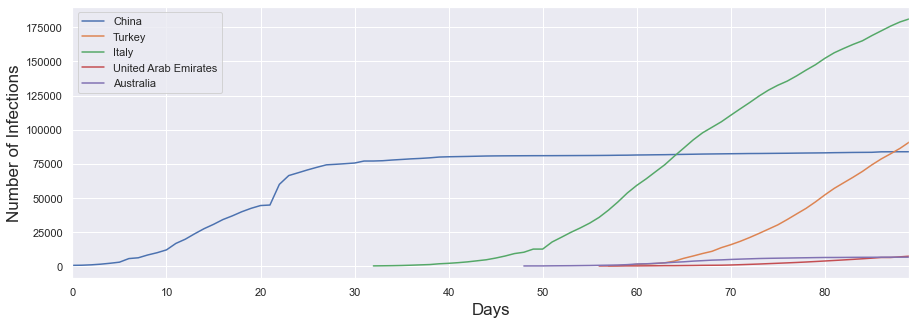

In [38]:
#Selecting only the part of the rows from the valid index and plotting
over100 = pd.concat([over.iloc[24,first.loc['China']:90],
                    over.iloc[122,first.loc['US']:90],
                    over.iloc[61,first.loc['Italy']:90],
                    over.iloc[125,first.loc['United Kingdom']:90],
                    over.iloc[6,first.loc['Australia']:90]],axis=1)
over100.plot(linewidth = 1.5)
plt.xlabel('Days',fontsize=17)
plt.ylabel('Number of Infections', fontsize=17)

## Normalisation by Population

The raw data includes the overall count of cases in each country. Clearly small countries will have smaller overall values than large countries.  Incorporating the population information of countries would help us see whether the number of cases in China and the US was more per-capita than those in other countries and find which country has the highest number as a proportion of the population.

The population data used was gotten here [datahub.io](https://datahub.io/JohnSnowLabs/population-figures-by-country) and has data per country up to 2016 in a handy CSV format. This was used to compute the number of confirmed cases for each country per million population. 


In [39]:
population_data=pd.read_csv('population_data.csv')
population_data=population_data[['Country','Year_2016']].rename(columns={'Year_2016':'Population'})
population_data

,Country,Population
0,Aruba,104822.0
1,Afghanistan,34656032.0
2,Angola,28813463.0
3,Albania,2876101.0
4,Andorra,77281.0
...,...,...
258,Kosovo,1816200.0
259,"Yemen, Rep.",27584213.0
260,South Africa,55908865.0
261,Zambia,16591390.0


In [40]:
df=grouped.copy()
df.columns=range(df.shape[1])
df=df.div(1000000)
df

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000665,0.000714,0.000784,0.000840,0.000906,0.000933,0.000996,0.001026,0.001092,0.001176
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000467,0.000475,0.000494,0.000518,0.000539,0.000548,0.000562,0.000584,0.000609,0.000634
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001983,0.002070,0.002160,0.002268,0.002418,0.002534,0.002629,0.002718,0.002811,0.002910
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000646,0.000659,0.000673,0.000673,0.000696,0.000704,0.000713,0.000717,0.000717,0.000723
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000019,0.000019,0.000019,0.000019,0.000019,0.000024,0.000024,0.000024,0.000024,0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000308,0.000308,0.000374,0.000374,0.000402,0.000418,0.000437,0.000449,0.000466,0.000474
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001


In [41]:
merged=pd.merge(df,population_data,left_index=True,right_on='Country',how='left')
merged=merged.dropna(how='any')
merged['Population'] = merged.Population.div(1000000)
merged.set_index('Country',inplace=True,drop=True)
merged

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000714,0.000784,0.000840,0.000906,0.000933,0.000996,0.001026,0.001092,0.001176,34.656032
Albania,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000475,0.000494,0.000518,0.000539,0.000548,0.000562,0.000584,0.000609,0.000634,2.876101
Algeria,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002070,0.002160,0.002268,0.002418,0.002534,0.002629,0.002718,0.002811,0.002910,40.606052
Andorra,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000659,0.000673,0.000673,0.000696,0.000704,0.000713,0.000717,0.000717,0.000723,0.077281
Angola,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000019,0.000019,0.000019,0.000019,0.000024,0.000024,0.000024,0.000024,0.000025,28.813463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001165,0.001302,0.001349,0.001405,0.001490,0.001565,0.001627,0.001678,0.001716,31.848200
Vietnam,0.0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000266,0.000267,0.000268,0.000268,0.000268,0.000268,0.000268,0.000268,0.000268,92.701100
West Bank and Gaza,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000308,0.000374,0.000374,0.000402,0.000418,0.000437,0.000449,0.000466,0.000474,4.551566


In [42]:
for i in range(len(merged)):
    norm=merged.iloc[:i,0:90]/merged.iloc[i,90]

norm

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.821429,21.678571,23.750000,25.500000,28.000000,30.000000,32.357143,33.321429,35.571429,36.642857
Albania,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.464286,15.928571,16.678571,16.964286,17.642857,18.500000,19.250000,19.571429,20.071429,20.857143
Algeria,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,65.178571,68.357143,70.821429,73.928571,77.142857,81.000000,86.357143,90.500000,93.892857,97.071429
Andorra,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.464286,22.785714,23.071429,23.535714,24.035714,24.035714,24.857143,25.142857,25.464286,25.607143
Angola,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.678571,0.678571,0.678571,0.678571,0.678571,0.678571,0.678571,0.857143,0.857143,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.642857,17.142857,17.142857,17.250000,17.571429,17.928571,17.928571,18.142857,18.464286,19.107143
Uzbekistan,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.392857,30.892857,35.642857,41.607143,46.500000,48.178571,50.178571,53.214286,55.892857,58.107143
Vietnam,0.0,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,...,9.214286,9.357143,9.464286,9.500000,9.535714,9.571429,9.571429,9.571429,9.571429,9.571429


Text(0, 0.5, 'Number of Infections')

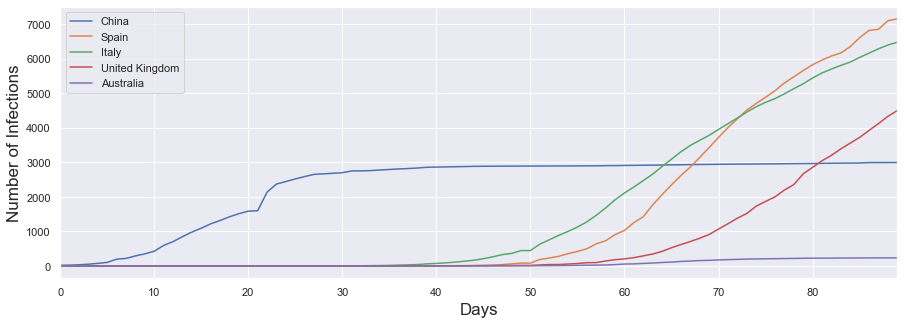

In [43]:
#Comparing normalized data for countries:
norm_compare = pd.concat([norm.loc['China'],
                    norm.loc['Spain'],
                    norm.loc['Italy'],
                    norm.loc['United Kingdom'],
                    norm.loc['Australia']],axis=1)
norm_compare.plot(linewidth = 1.5)
plt.xlabel('Days',fontsize=17)
plt.ylabel('Number of Infections', fontsize=17)

In [44]:
norm_compare_latest=norm[[89]]
norm_compare_latest=norm_compare_latest.sort_values(89,ascending=False)
norm_compare_latest

,89
Country,
Spain,7150.357143
Italy,6472.428571
France,5588.571429
Germany,5252.321429
United Kingdom,4494.857143
...,...
Mauritania,0.250000
Burundi,0.178571
Bhutan,0.178571


The country with the highest number of cases per million is Spain

Text(0.5, 1.0, 'Comparison by Population')

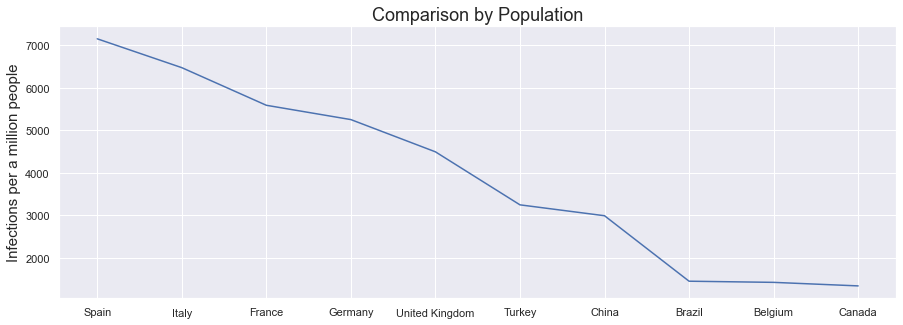

In [45]:
plt.plot(norm_compare_latest.head(10))
plt.ylabel('Infections per a million people',fontsize=15)
plt.title('Comparison by Population',fontsize=18)

## A Predictive Model

It is well understood that the spread of the virus follows an exponential pattern. This is because each infected person infects more than one new person on average, leading to exponential growth.  This is why the key to stopping the growth of the pandemic is to reduce the number of people infected by stopping contact and isolating infected poeple. 

An exponential curve has the equation $y = e^{mx}$. It can be converted to a linear relationship by taking the logarithm of each side: $log(y) = mx$.  This means that we can fit a linear regression model to the data as long as we take the log of the number of cases. 

We can build a linear regression model from a counntry with a clear exponential curve to predict the log of the number of cases. 


## US

In [46]:
grouped.columns=range(grouped.shape[1])
grouped

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,665,714,784,840,906,933,996,1026,1092,1176
Albania,0,0,0,0,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634
Algeria,0,0,0,0,0,0,0,0,0,0,...,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
Andorra,0,0,0,0,0,0,0,0,0,0,...,646,659,673,673,696,704,713,717,717,723
Angola,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,24,24,24,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,308,308,374,374,402,418,437,449,466,474
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [47]:
us=pd.DataFrame(grouped.loc['US'])
us['logInfections']=np.log(us.US)
us.rename(columns={'US':'Infections'},inplace=True)
us.index.name='Time'
us.reset_index(inplace=True,)
us

,Time,Infections,logInfections
0,0,1,0.000000
1,1,1,0.000000
2,2,2,0.693147
3,3,2,0.693147
4,4,5,1.609438
...,...,...,...
87,87,732197,13.503805
88,88,758809,13.539505
89,89,784326,13.572580
90,90,812036,13.607300


In [48]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X=us.Time.values.reshape(-1, 1)
y=us.logInfections.values.reshape(-1, 1)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
                          
#Testing how well the model fits the data:                          
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))


MSE:  1.28888250390132
RMSE:  1.1352896123462595
R^2:  0.9233254055138567
MAE:  0.966860650617728


In [49]:
us['Predictions']=lr_model.predict(X)
us

,Time,Infections,logInfections,Predictions
0,0,1,0.000000,-0.564079
1,1,1,0.000000,-0.395972
2,2,2,0.693147,-0.227864
3,3,2,0.693147,-0.059756
4,4,5,1.609438,0.108352
...,...,...,...,...
87,87,732197,13.503805,14.061300
88,88,758809,13.539505,14.229407
89,89,784326,13.572580,14.397515
90,90,812036,13.607300,14.565623


In [50]:
us.Predictions=us.Predictions.apply(lambda x:np.exp(x)).round()
us

,Time,Infections,logInfections,Predictions
0,0,1,0.000000,1.0
1,1,1,0.000000,1.0
2,2,2,0.693147,1.0
3,3,2,0.693147,1.0
4,4,5,1.609438,1.0
...,...,...,...,...
87,87,732197,13.503805,1278630.0
88,88,758809,13.539505,1512701.0
89,89,784326,13.572580,1789622.0
90,90,812036,13.607300,2117238.0


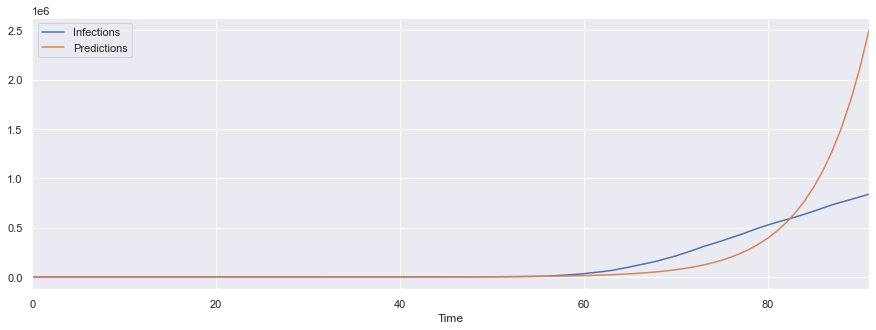

In [51]:
fig,ax=plt.subplots()
us.plot(x='Time',y='Infections', ax=ax,label='Infections')
us.plot(x='Time',y='Predictions', ax=ax,label='Predictions')

The model was not accurate, as most of the predictions were incorrect. They were either less than the actual value or way more than the actual value.


Data from a country like China shows divergence from the model since they have managed to slow the growth of cases.  
### China

In [52]:
china=pd.DataFrame(grouped.loc['China'])
china.rename(columns={'China':'Infections'},inplace=True)
china.index.name='Time'
china.reset_index(inplace=True)
china['Predictions']=lr_model.predict(china.Time.values.reshape(-1,1))
china['Predictions']=china['Predictions'].apply(lambda x:np.exp(x)).round()
china

,Time,Infections,Predictions
0,0,548,1.0
1,1,643,1.0
2,2,920,1.0
3,3,1406,1.0
4,4,2075,1.0
...,...,...,...
87,87,83787,1278630.0
88,88,83805,1512701.0
89,89,83817,1789622.0
90,90,83853,2117238.0


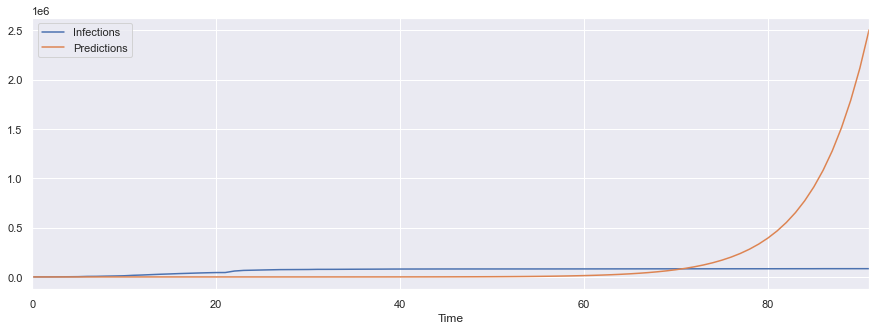

In [53]:
fig,ax=plt.subplots()
china.plot(x='Time',y='Infections', ax=ax,label='Infections')
china.plot(x='Time',y='Predictions', ax=ax,label='Predictions')

This plot shows that the cases in China do not follow an exponential growth. This is because China took measures to stop the spread of the virus, thereby redicing the number of infections.

### If China hadn't acted to stop the virus:

In [54]:
#The model's prediction for number of cases at day 90:
predicted_value=lr_model.predict(np.array(90).reshape(-1,1))
predicted_value=np.exp(predicted_value).round()
print('The number of cases predicted by the model is:',predicted_value.astype(int))

The number of cases predicted by the model is: [[2117238]]


The predicted number of infections is over the actual number by more than **2 million!!** This is just to show hos adverse the situation can get if it is not controlled